In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## The Adult dataset
The information is a replica of the notes for the abalone dataset from the UCI repository.

**1.Title of Database: adult**

**2.Sources:**

(a) Original owners of database (name/phone/snail address/email address)
US Census Bureau.

(b) Donor of database (name/phone/snail address/email address)
Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com

(c) Date received (databases may change over time without name change!)05/19/96

**3.Past Usage:**

(a) Complete reference of article where it was described/used
@inproceedings{kohavi-nbtree,author={Ron Kohavi},
title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid},booktitle={Proceedings of the Second International Conference on Knowledge Discovery and Data Mining},year = 1996,pages={to appear}}

(b) Indication of what attribute(s) were being predictedSalary greater or less than 50,000.

(c) Indication of study's results (i.e. Is it a good domain to use?)
Hard domain with a nice number of records.
The following results obtained using MLC++ with default settings
for the algorithms mentioned below.
Algorithm	Error
1	C4.5	15.54
2	C4.5-auto	14.46
3	C4.5-rules	14.94
4	Voted ID3 (0.6)	15.64
5	Voted ID3 (0.8)	16.47
6	T2	16.84
7	1R	19.54
8	NBTree	14.10
9	CN2	16.00
10	HOODG	14.82
11	FSS Naive Bayes	14.05
12	IDTM (Decision table)	14.46
13	Naive-Bayes	16.12
14	Nearest-neighbor (1)	21.42
15	Nearest-neighbor (3)	20.35
16	OC1	15.04
17	Pebls	Crashed. Unknown why (bounds WERE increased)

**4.Relevant Information Paragraph:**
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

**5.Number of Instances**
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

**6.Number of Attributes**

6 continuous, 8 nominal attributes.

**7.Attribute Information:**

**age: continuous.**

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt:** continuous.

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num:** continuous.

**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex:** Female, Male.

**capital-gain:** continuous.

**capital-loss:** continuous.

**hours-per-week:** continuous.

**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**class:** >50K, <=50K

**8.Missing Attribute Values:**

7% have missing values.

**9.Class Distribution:**

Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

**10.Notes for Delve**

One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.
Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.
The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.


In [ ]:
df=pd.read_csv(r"C:\Users\shiva\Downloads\adult.csv")
df.head(5)

In [3]:
df.shape

(48842, 15)

In [4]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [163]:
for i in df:
    print(f'the value count of the column:',df[i].value_counts())
    print(f'the type of values present in the column is :',df[i].unique())
    print(f'the count of unique value is:',df[i].nunique())
    print('--------------------------------------------------------------------------------------------')

the value count of the column: age
Senior         17316
Young Adult    13836
Adult          12897
Retired         4054
Teen             594
Name: count, dtype: int64
the type of values present in the column is : ['Young Adult', 'Adult', 'Senior', 'Retired', 'Teen']
Categories (5, object): ['Teen' < 'Young Adult' < 'Adult' < 'Senior' < 'Retired']
the count of unique value is: 5
--------------------------------------------------------------------------------------------
the value count of the column: workclass
Private             33780
Self-emp-not-inc     3860
Local-gov            3136
Other                2783
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
the type of values present in the column is : ['Private' 'Local-gov' 'Other' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']
the count of unique value is: 9
--------------------------

Here we can see that there are some values where values are not present instead of null value there is a **'?'** mark present.so, we will fill that value with other while cleaning the data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [22]:
df.describe(include='O').T

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
gender,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


In [25]:
df.duplicated().sum()

145

In [26]:
df.drop_duplicates(keep='first',inplace=True)

In [27]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [13]:
df['workclass'] = df['workclass'].replace({'?':'Other'})

In [15]:
df['occupation'] = df['occupation'].replace({'?':'Other'})

In [16]:
df['native-country'] = df['native-country'].replace({'?':'Other'})

In [18]:
bins = [0,18,30,40,60,100]
labels = ['Teen','Young Adult','Adult','Senior','Retired']

In [19]:
df['age']= pd.cut(df['age'],bins = bins,labels=labels,right = False)

In [20]:
df['age'].value_counts()

age
Senior         17343
Young Adult    13920
Adult          12929
Retired         4055
Teen             595
Name: count, dtype: int64

In [21]:
df['educational-num'].value_counts()

educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

In [28]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Young Adult,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,Adult,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,Young Adult,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,Senior,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,Young Adult,Other,103497,Some-college,10,Never-married,Other,Own-child,White,Female,0,0,30,United-States,<=50K


### Age

In [29]:
df.age.value_counts()

age
Senior         17316
Young Adult    13836
Adult          12897
Retired         4054
Teen             594
Name: count, dtype: int64

In [32]:
df.groupby('age')['hours-per-week'].agg('mean')

age
Teen           21.139731
Young Adult    37.115351
Adult          43.191517
Senior         43.172442
Retired        34.039221
Name: hours-per-week, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

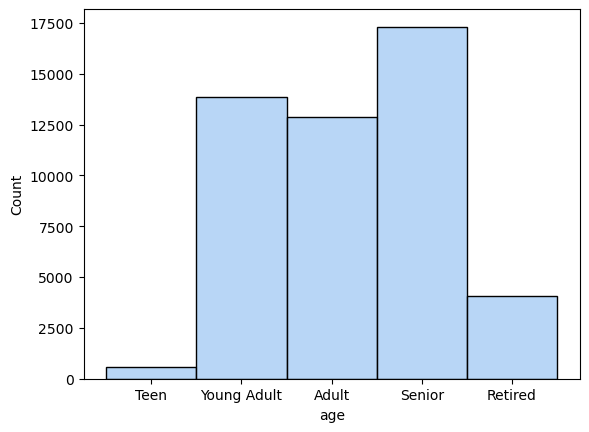

In [77]:
sns.histplot(data=df.age)

<Axes: xlabel='age', ylabel='Count'>

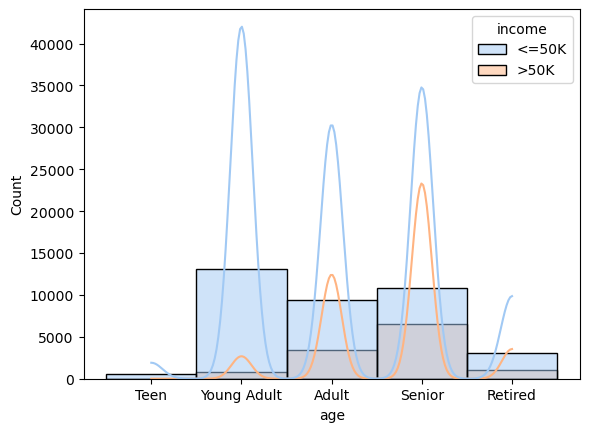

In [89]:
sns.histplot(data = df, kde = True, x = 'age', hue = 'income')

### Workclass

In [39]:
df.workclass.value_counts()

workclass
Private             33780
Self-emp-not-inc     3860
Local-gov            3136
Other                2783
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

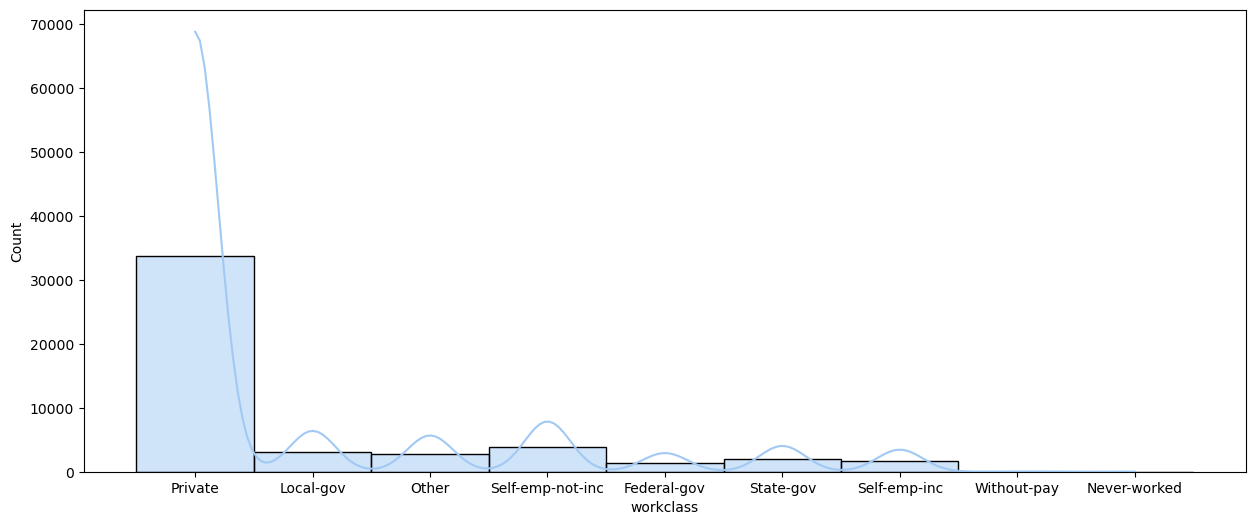

In [88]:
plt.figure(figsize = (15, 6))

sns.histplot(data = df['workclass'], kde = True)
plt.show()

In [40]:
df.groupby('workclass')['hours-per-week'].agg('mean')

workclass
Federal-gov         41.513268
Local-gov           40.847258
Never-worked        28.900000
Other               31.776500
Private             40.277827
Self-emp-inc        48.593270
Self-emp-not-inc    44.397409
State-gov           39.090863
Without-pay         33.952381
Name: hours-per-week, dtype: float64

In [91]:
df.groupby('workclass')['income'].agg('count')

workclass
Federal-gov          1432
Local-gov            3136
Never-worked           10
Other                2783
Private             33780
Self-emp-inc         1694
Self-emp-not-inc     3860
State-gov            1981
Without-pay            21
Name: income, dtype: int64

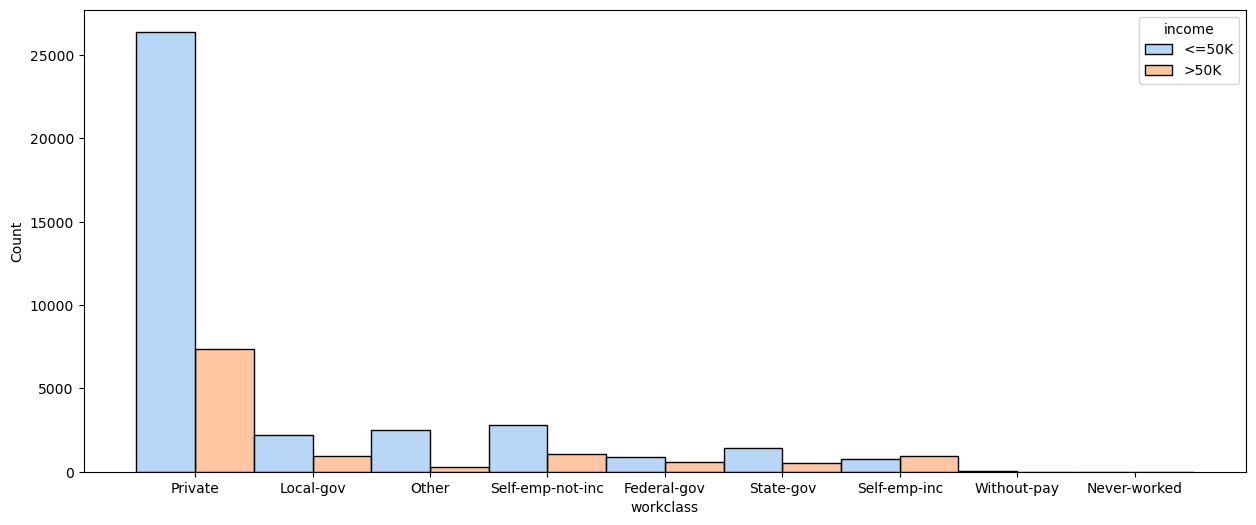

In [92]:
plt.figure(figsize = (15, 6))
sns.histplot(data = df, x = 'workclass', hue = 'income', multiple = "dodge");
plt.show()

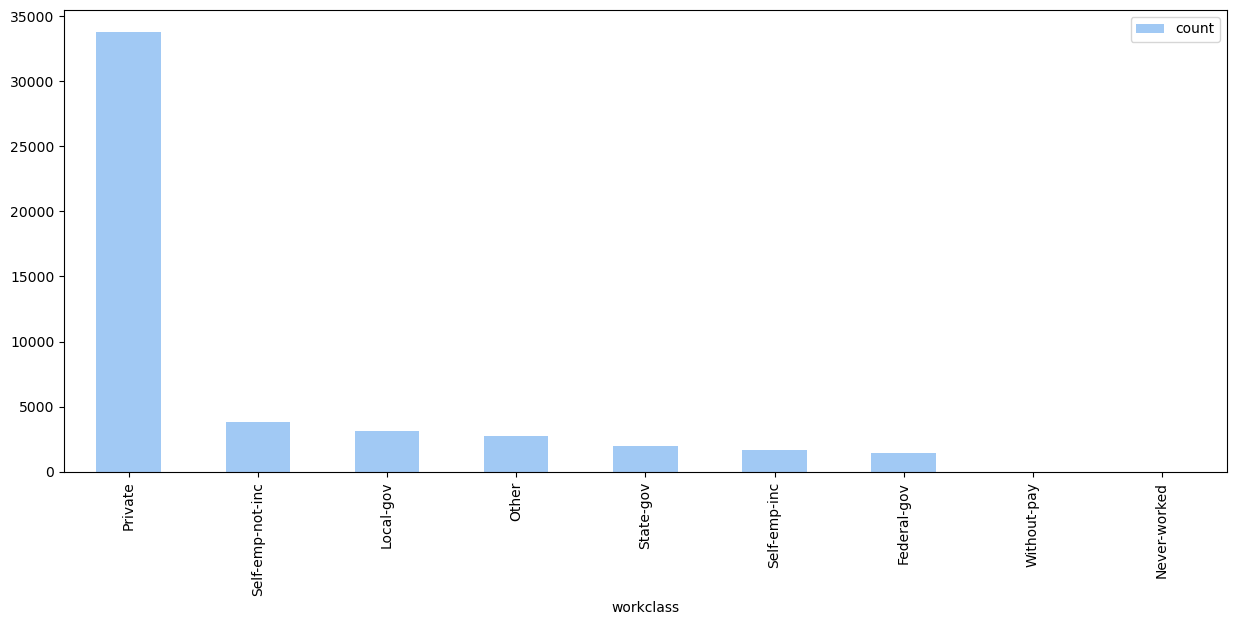

In [80]:
plt.figure(figsize = (15, 6))
df['workclass'].value_counts().plot.bar(legend=True)
plt.show()

### drop fnlwgt column as it is not needed for modelling

In [44]:
df.drop(columns='fnlwgt',axis=1)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Young Adult,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,Adult,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,Young Adult,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,Senior,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,Young Adult,Other,Some-college,10,Never-married,Other,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Young Adult,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,Senior,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,Senior,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,Young Adult,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Education

In [47]:
df['education'].value_counts()

education
HS-grad         15729
Some-college    10835
Bachelors        7998
Masters          2655
Assoc-voc        2058
11th             1811
Assoc-acdm       1601
10th             1388
7th-8th           954
Prof-school       833
9th               756
12th              655
Doctorate         592
5th-6th           506
1st-4th           245
Preschool          81
Name: count, dtype: int64

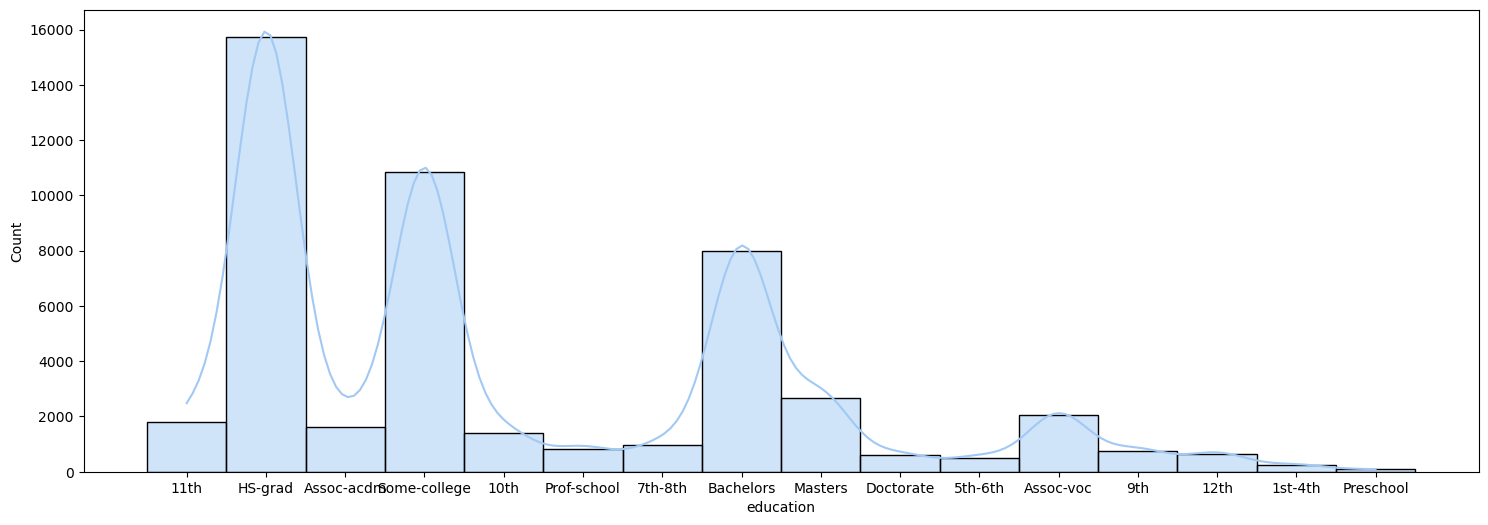

In [87]:
plt.figure(figsize = (18, 6))
sns.histplot(data = df['education'],kde=True)
plt.show()

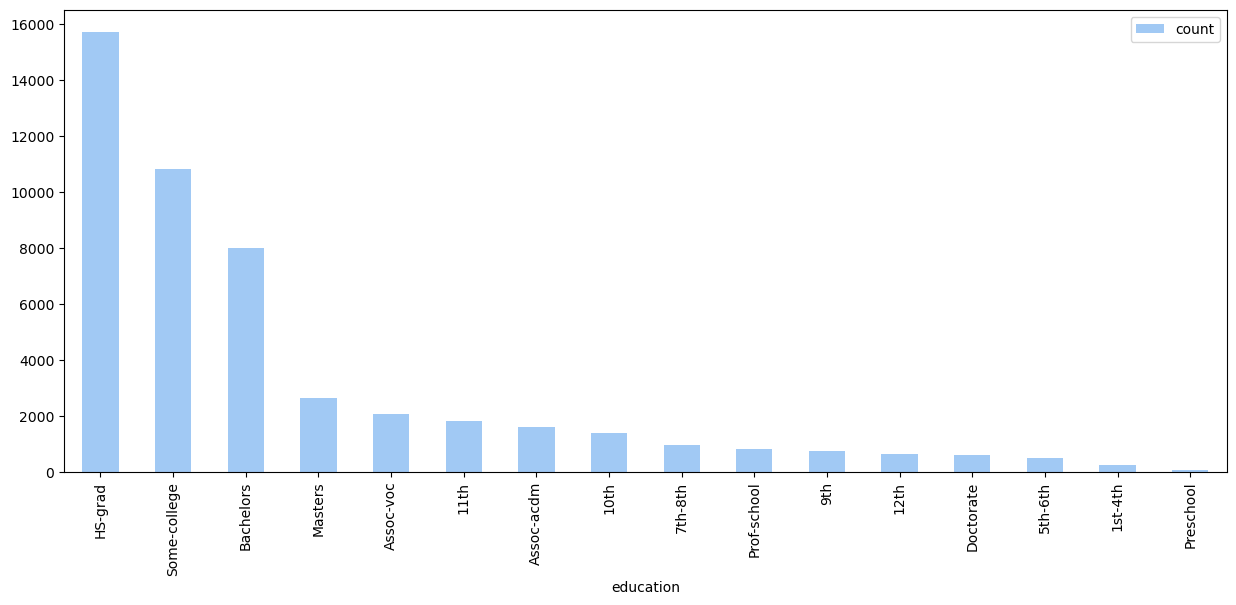

In [81]:
plt.figure(figsize = (15, 6))
df['education'].value_counts().plot.bar(legend=True)
plt.show()

<Figure size 1800x2800 with 0 Axes>

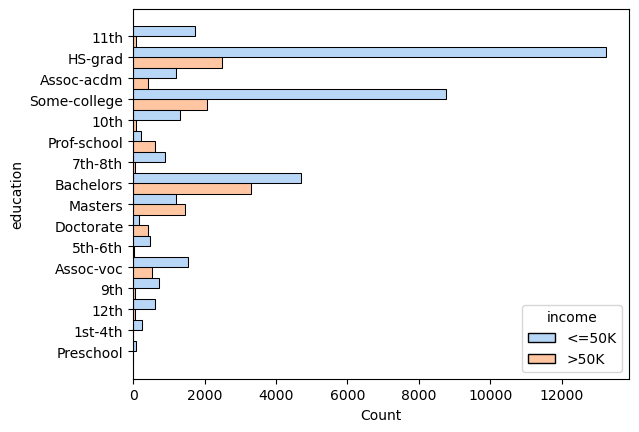

<Figure size 1800x2800 with 0 Axes>

In [93]:
sns.histplot(data = df, y = 'education', hue = 'income', multiple = "dodge")
plt.figure(figsize=(18,28))

### we can delete the column educational-num as this column is similar to the education 

In [65]:
df.drop(columns='educational-num',axis=True)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Young Adult,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,Adult,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,Young Adult,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,Senior,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,Young Adult,Other,103497,Some-college,Never-married,Other,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Young Adult,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,Senior,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,Senior,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,Young Adult,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Marital Status

In [53]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22333
Never-married            16026
Divorced                  6628
Separated                 1530
Widowed                   1518
Married-spouse-absent      625
Married-AF-spouse           37
Name: count, dtype: int64

<Axes: xlabel='marital-status'>

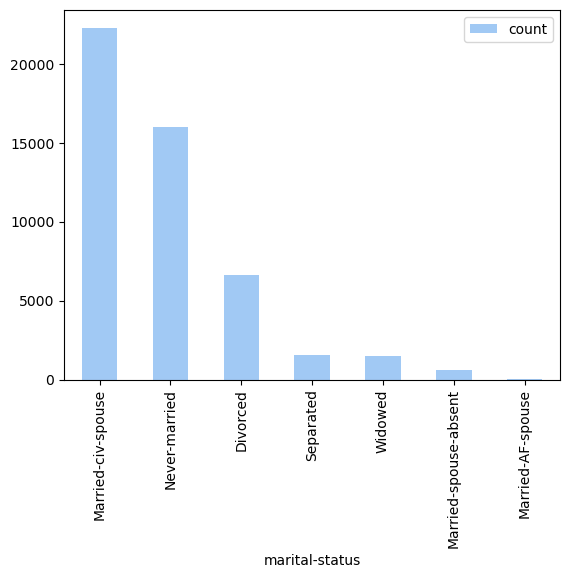

In [83]:
df['marital-status'].value_counts().plot.bar(legend=True)

### occupation

In [60]:
df['occupation'].value_counts()

occupation
Prof-specialty       6156
Craft-repair         6081
Exec-managerial      6075
Adm-clerical         5597
Sales                5492
Other-service        4909
Machine-op-inspct    3007
Other                2793
Transport-moving     2354
Handlers-cleaners    2067
Farming-fishing      1484
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

<Axes: xlabel='occupation'>

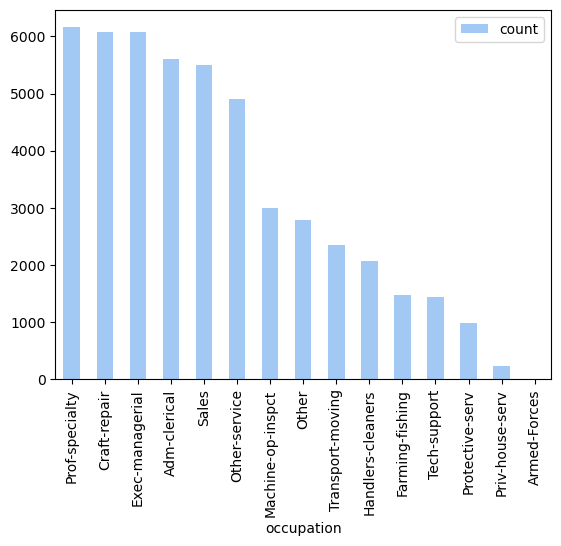

In [82]:
df['occupation'].value_counts().plot.bar(legend=True)

### relationship

In [61]:
df['relationship'].value_counts()

relationship
Husband           19670
Not-in-family     12536
Own-child          7534
Unmarried          5123
Wife               2331
Other-relative     1503
Name: count, dtype: int64

<Axes: xlabel='relationship'>

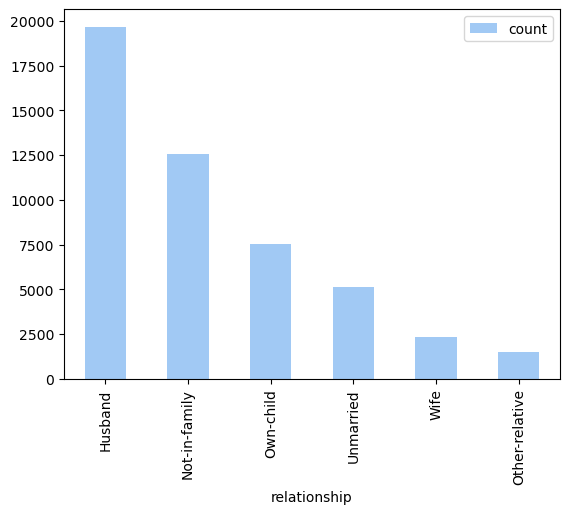

In [84]:
df['relationship'].value_counts().plot.bar(legend=True)

### race

In [63]:
df['race'].value_counts()

race
White                 41633
Black                  4678
Asian-Pac-Islander     1510
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

<Axes: xlabel='race'>

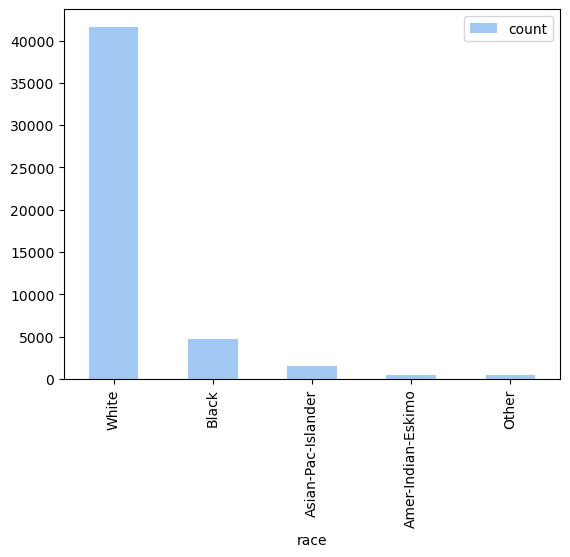

In [85]:
df['race'].value_counts().plot.bar(legend=True)

### native-country

In [64]:
df['native-country'].value_counts()

native-country
United-States                 43708
Mexico                          941
Other                           854
Philippines                     293
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           150
Cuba                            138
England                         127
China                           122
South                           114
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          85
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

<Axes: xlabel='native-country'>

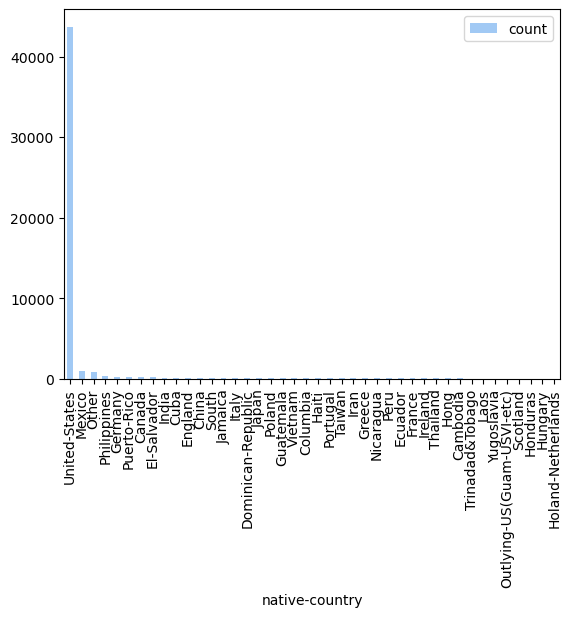

In [86]:
df['native-country'].value_counts().plot.bar(legend=True)

In [94]:
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Young Adult,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


### Gender

In [95]:
df['gender'].value_counts()

gender
Male      32549
Female    16148
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

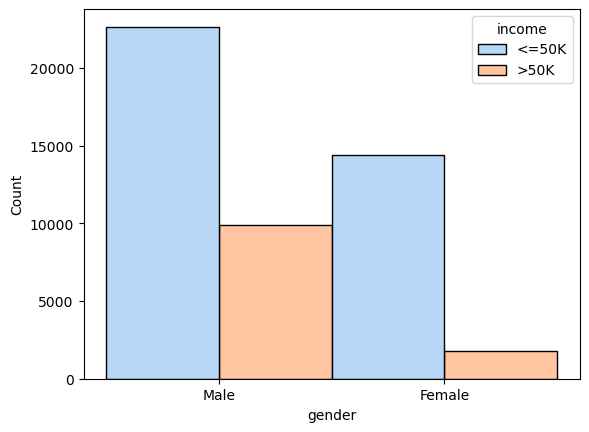

In [96]:
sns.histplot(data = df, x = 'gender', hue = 'income', multiple = "dodge")

##### The data shows that income is more than  50𝑘𝑓𝑜𝑟𝑚𝑎𝑙𝑒𝑒𝑚𝑝𝑙𝑜𝑦𝑒𝑒𝑠𝑎𝑛𝑑𝑙𝑒𝑠𝑠𝑡ℎ𝑎𝑛 50k for female employees.

### Hours-per-week 

In [97]:
df['hours-per-week'].value_counts()

hours-per-week
40    22705
50     4235
45     2712
60     2176
35     1933
      ...  
69        1
87        1
94        1
82        1
79        1
Name: count, Length: 96, dtype: int64

In [98]:
df.groupby('gender')['hours-per-week'].agg('mean')

gender
Female    36.403579
Male      42.423730
Name: hours-per-week, dtype: float64

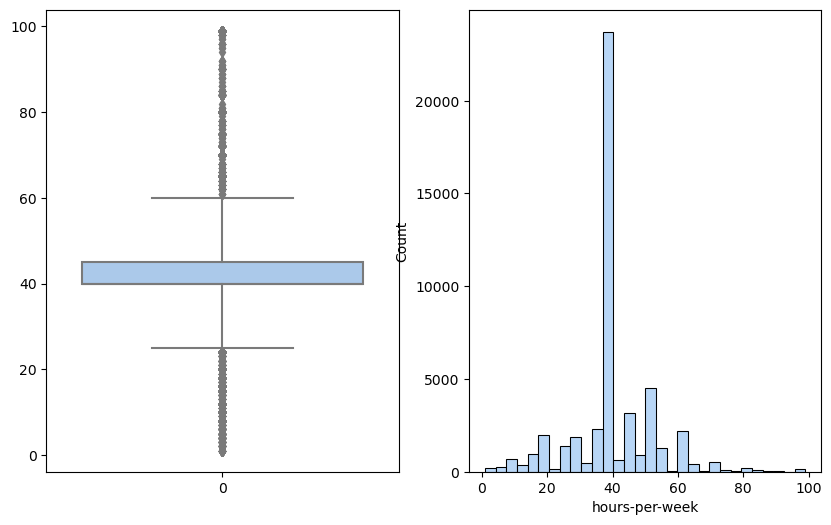

In [109]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=df["hours-per-week"],whis=3)
plt.subplot(1,2,2)
sns.histplot(data=df["hours-per-week"],bins=30);

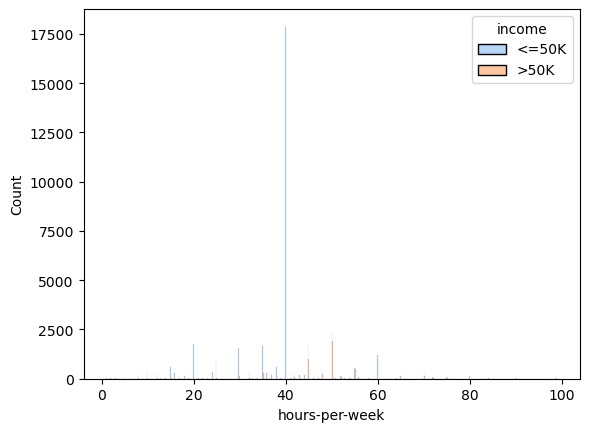

In [99]:
sns.histplot(data = df, x = 'hours-per-week', hue = 'income', multiple = "dodge");

### Income

In [100]:
df['income'].value_counts()

income
<=50K    37026
>50K     11671
Name: count, dtype: int64

In [101]:
df.groupby('income')['hours-per-week'].mean()

income
<=50K    38.842705
>50K     45.454974
Name: hours-per-week, dtype: float64

##### The average hours per week for the income group less than or equal to  50𝐾𝑖𝑠38.8ℎ𝑜𝑢𝑟𝑠.𝑆𝑖𝑚𝑖𝑙𝑎𝑟𝑙𝑦,𝑡ℎ𝑒𝑎𝑣𝑒𝑟𝑎𝑔𝑒ℎ𝑜𝑢𝑟𝑠𝑝𝑒𝑟𝑤𝑒𝑒𝑘𝑓𝑜𝑟𝑡ℎ𝑒𝑖𝑛𝑐𝑜𝑚𝑒𝑔𝑟𝑜𝑢𝑝𝑔𝑟𝑒𝑎𝑡𝑒𝑟𝑡ℎ𝑎𝑛 50k is 45.47 hours.

In [104]:
df.groupby('gender')['income'].

gender
Female    16148
Male      32549
Name: income, dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

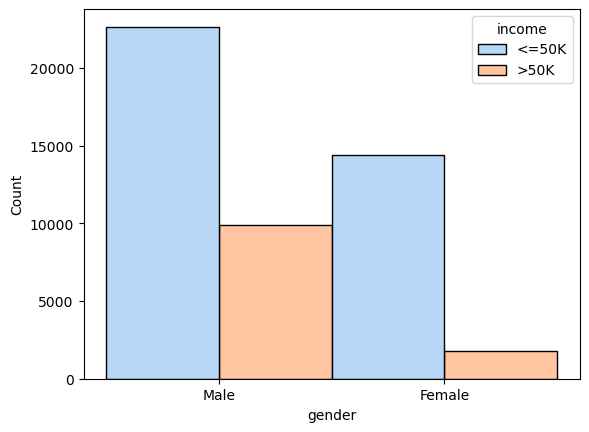

In [105]:
sns.histplot(data = df, x = 'gender', hue = 'income', multiple = "dodge")

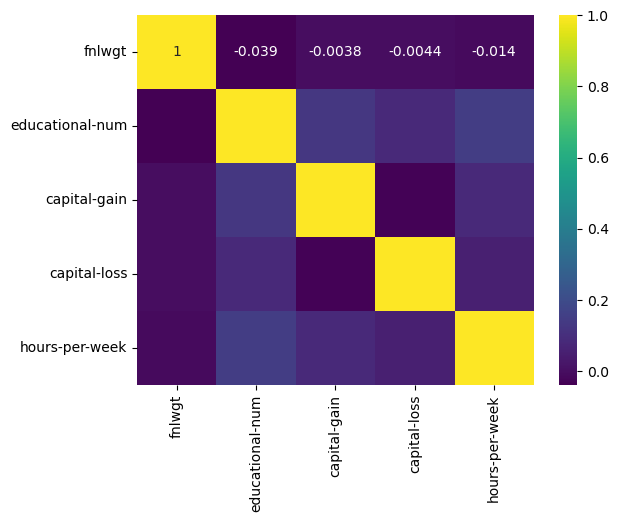

In [110]:
df_numeric = df.select_dtypes(include="number")
sns.heatmap(df_numeric.corr(), annot=True,  cmap="viridis");

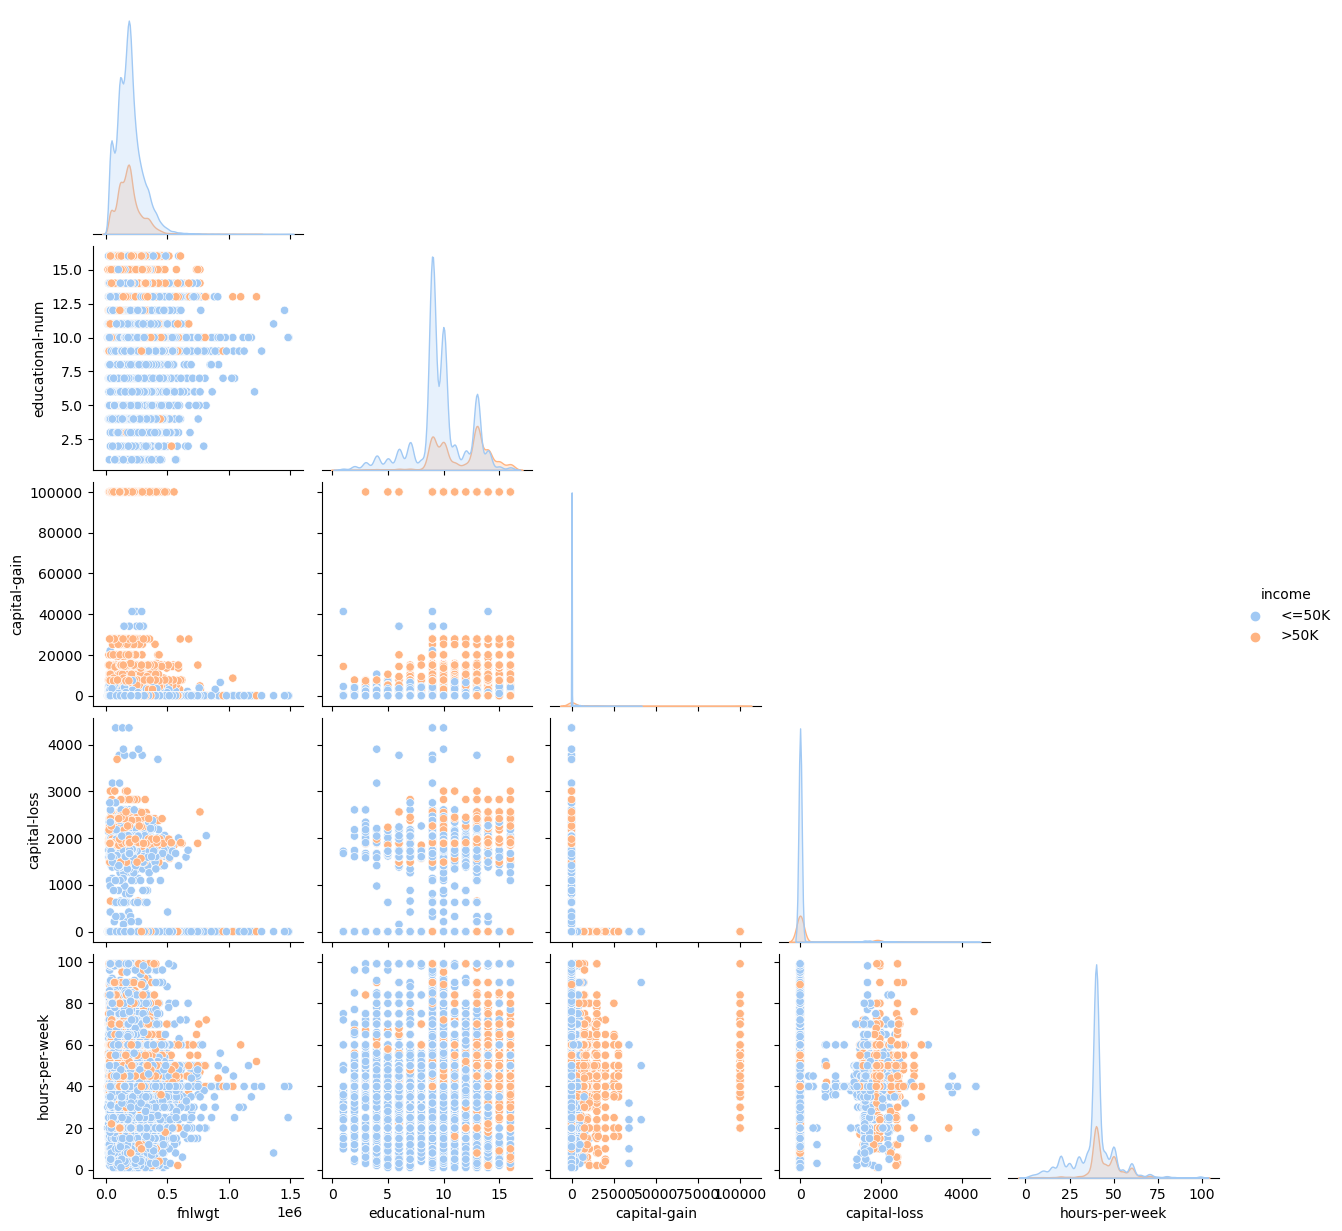

In [111]:
sns.pairplot(df, hue="income", corner=True);

In [112]:
df['income'] = df['income'].map({"<=50K": 0, ">50K": 1})

### Train Test Split

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x=df.drop(['income'],axis=1)
y=df['income']

In [116]:
categorical_features = ['age','workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']
numeric_features = ['educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [117]:
df.dtypes

age                category
workclass            object
fnlwgt                int64
education            object
educational-num       int64
marital-status       object
occupation           object
relationship         object
race                 object
gender               object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
income                int64
dtype: object

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=101)

### Modelling

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [120]:
lr_pipeline = Pipeline([
    ('preprocessor',
     ColumnTransformer(
         transformers=[('num', StandardScaler(), numeric_features),
                       ('cat',
                        OneHotEncoder(),
                        categorical_features)])),
    ('logistic', LogisticRegression()) #max_iter=1000
])

In [122]:
lr_pipeline = Pipeline([
    ('preprocessor',
     ColumnTransformer(
         transformers=[
             ('num', StandardScaler(), numeric_features),
             ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
         ]
     )
    ),
    ('logistic', LogisticRegression())  # max_iter=1000
])
#  parameter grid

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10)
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]

lr_param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
    #'logistic__C': C,
    #'logistic__solver': solver,
    'logistic__max_iter': [500, 1000],
    'logistic__random_state': [101],
    # 'logistic__penalty': penalty,
    'logistic__class_weight': class_weight
}

# GridSearchCV
lr_grid_search = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    scoring = "accuracy",
    n_jobs=-1,
    cv=10)
lr_grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['age',
                                                                          'workclass',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__max_iter': [500, 1000],
                         'logistic__random_state': [101]},
             scoring='accuracy')

In [123]:
lr_grid_search.best_params_

{'logistic__C': 1,
 'logistic__class_weight': None,
 'logistic__max_iter': 500,
 'logistic__random_state': 101}

In [124]:
lr_grid_search.best_score_

0.8551222938901821

In [125]:
y_pred = lr_grid_search.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [127]:
def eval_metric(model, x_train, y_train, x_test, y_test):
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [128]:
eval_metric(lr_grid_search, x_train, y_train, x_test, y_test)

Test_Set
[[6894  512]
 [ 937 1397]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7406
           1       0.73      0.60      0.66      2334

    accuracy                           0.85      9740
   macro avg       0.81      0.76      0.78      9740
weighted avg       0.84      0.85      0.85      9740


Train_Set
[[27637  1983]
 [ 3629  5708]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     29620
           1       0.74      0.61      0.67      9337

    accuracy                           0.86     38957
   macro avg       0.81      0.77      0.79     38957
weighted avg       0.85      0.86      0.85     38957



In [129]:
eval_metric(lr_grid_search, x_train, y_train, x_test, y_test)

Test_Set
[[6894  512]
 [ 937 1397]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7406
           1       0.73      0.60      0.66      2334

    accuracy                           0.85      9740
   macro avg       0.81      0.76      0.78      9740
weighted avg       0.84      0.85      0.85      9740


Train_Set
[[27637  1983]
 [ 3629  5708]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     29620
           1       0.74      0.61      0.67      9337

    accuracy                           0.86     38957
   macro avg       0.81      0.77      0.79     38957
weighted avg       0.85      0.86      0.85     38957



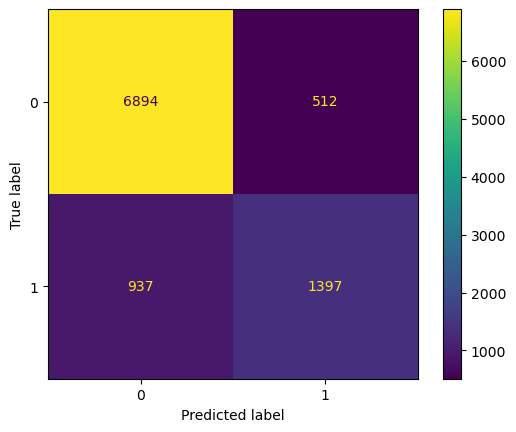

In [130]:
ConfusionMatrixDisplay.from_estimator(lr_grid_search, x_test, y_test);

In [131]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve

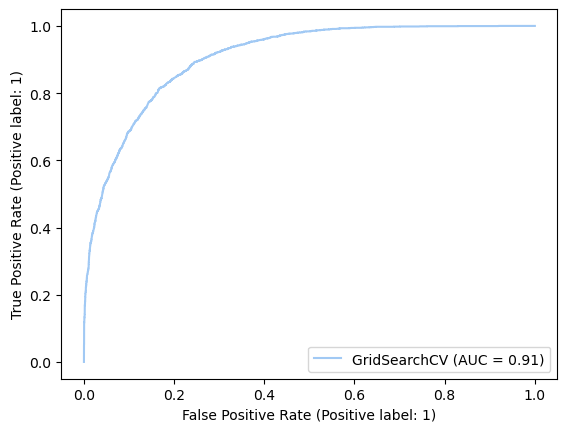

In [133]:
RocCurveDisplay.from_estimator(lr_grid_search, x_test, y_test);

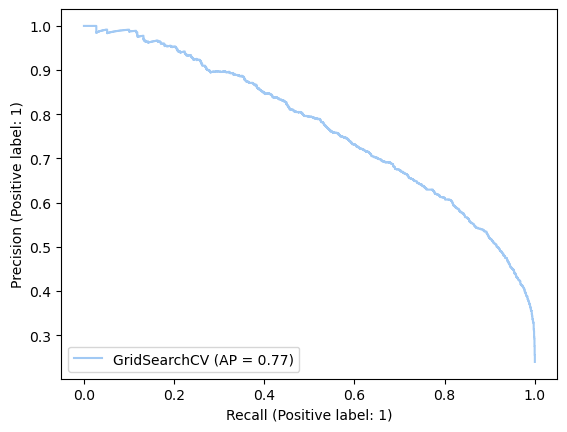

In [134]:
# I should check Precision Recall because it is an unbalanced dataset
PrecisionRecallDisplay.from_estimator(lr_grid_search, x_test, y_test);

### K-Nearest Neighbour(KNN)Classification

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [136]:
# pipeline for KNN 
knn_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])),
    ('classifier', KNeighborsClassifier())
])

# parameter grid
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}

# GridSearchCV
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=10)
knn_grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['age',
                                                                          'workclass',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [3, 5, 7, 9],
                         'classifier__weights': ['uniform', 'distance']})

In [137]:
print("Best Parameters for KNN:", knn_grid_search.best_params_)
print("Best Performance for KNN :", knn_grid_search.best_score_)

Best Parameters for KNN: {'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
Best Performance for KNN : nan


In [139]:
eval_metric(knn_grid_search, x_train, y_train, x_test, y_test)

Test_Set
[[6733  673]
 [ 966 1368]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7406
           1       0.67      0.59      0.63      2334

    accuracy                           0.83      9740
   macro avg       0.77      0.75      0.76      9740
weighted avg       0.83      0.83      0.83      9740


Train_Set
[[27815  1805]
 [ 2706  6631]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     29620
           1       0.79      0.71      0.75      9337

    accuracy                           0.88     38957
   macro avg       0.85      0.82      0.84     38957
weighted avg       0.88      0.88      0.88     38957



In [140]:
eval_metric(knn_grid_search, x_train, y_train, x_test, y_test)

Test_Set
[[6733  673]
 [ 966 1368]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7406
           1       0.67      0.59      0.63      2334

    accuracy                           0.83      9740
   macro avg       0.77      0.75      0.76      9740
weighted avg       0.83      0.83      0.83      9740


Train_Set
[[27815  1805]
 [ 2706  6631]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     29620
           1       0.79      0.71      0.75      9337

    accuracy                           0.88     38957
   macro avg       0.85      0.82      0.84     38957
weighted avg       0.88      0.88      0.88     38957



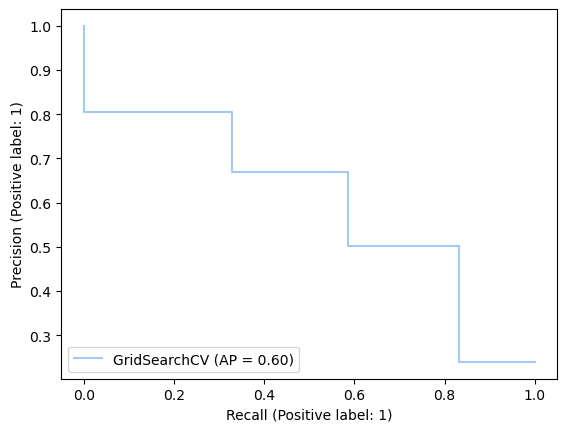

In [142]:
PrecisionRecallDisplay.from_estimator(knn_grid_search, x_test, y_test);

In [143]:
from sklearn.metrics import precision_recall_curve, roc_curve, ConfusionMatrixDisplay

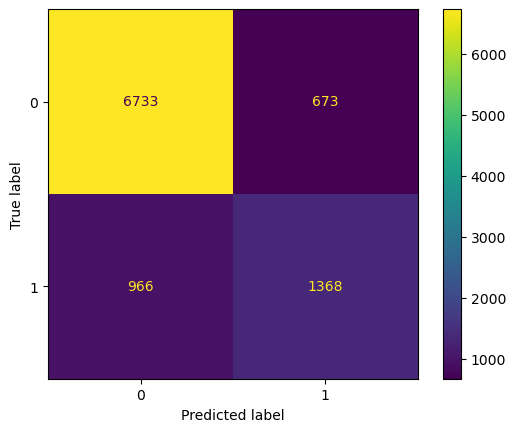

In [145]:
ConfusionMatrixDisplay.from_estimator(knn_grid_search, x_test, y_test);

In [146]:
# KNN pipeline
knn_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])),
    ('classifier', KNeighborsClassifier())
])

# KNN- parameter grid
knn_param_grid = {
    'classifier__n_neighbors': [1, 100],
    'classifier__p': [1, 2],
    'classifier__weights': ['uniform', 'distance']
}

# KNN- GridSearchCV
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=10)
knn_grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['age',
                                                                          'workclass',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [1, 100],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance']})

In [147]:
print("Best Parameters for KNN:", knn_grid_search.best_params_)
print("Best Performance for KNN :", knn_grid_search.best_score_)

Best Parameters for KNN: {'classifier__n_neighbors': 1, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Best Performance for KNN : nan


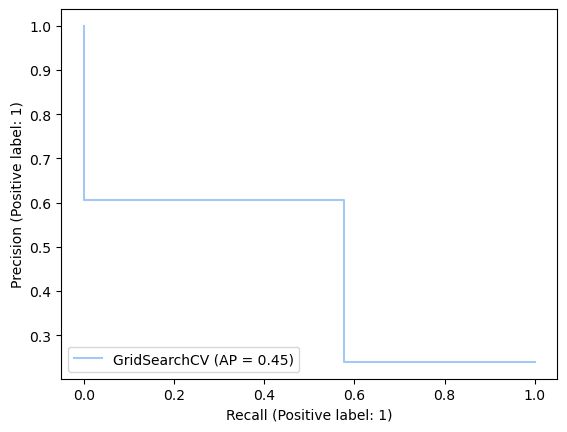

In [148]:
PrecisionRecallDisplay.from_estimator(knn_grid_search, x_test, y_test);

### Support Vector Classifier

In [149]:
# pipeline for SVC 
svc_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])),
    ('classifier', SVC())
])

# SVC - parametre grid
svc_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    #'classifier__class_weight':["balanced"],
    'classifier__gamma': ['scale', 'auto']
}

# SVC - GridSearchCV
svc_grid_search = GridSearchCV(svc_pipeline, svc_param_grid, cv=5, n_jobs=-1)
svc_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['age',
                                                                          'workclass',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']})

In [150]:
print("Best Parameters for SVC:", svc_grid_search.best_params_)
print("Best Performance for SVC:", svc_grid_search.best_score_)

Best Parameters for SVC: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Performance for SVC: nan


In [152]:
eval_metric(svc_grid_search, x_train, y_train, x_test, y_test)

Test_Set
[[6909  497]
 [ 959 1375]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7406
           1       0.73      0.59      0.65      2334

    accuracy                           0.85      9740
   macro avg       0.81      0.76      0.78      9740
weighted avg       0.84      0.85      0.84      9740


Train_Set
[[27682  1938]
 [ 3721  5616]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     29620
           1       0.74      0.60      0.66      9337

    accuracy                           0.85     38957
   macro avg       0.81      0.77      0.79     38957
weighted avg       0.85      0.85      0.85     38957



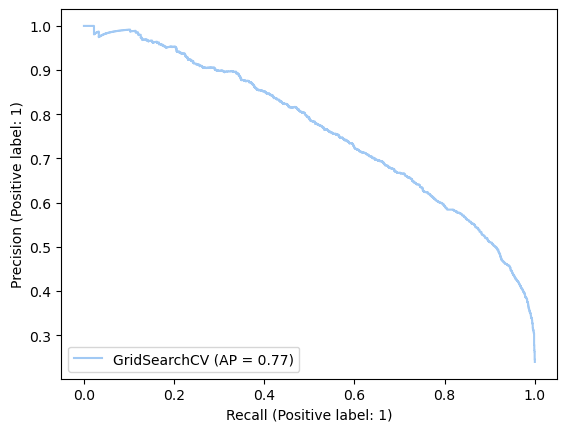

In [154]:
PrecisionRecallDisplay.from_estimator(svc_grid_search, x_test, y_test);

Summary

Since the classes in the target in the data have equal importance in terms of predictability and my target classes are unbalanced, I decided to create the final model by looking at accuransy and macro avg.

When I evaluate according to these conditions, since I got the best scores in SVM, I will create the final model with it.

### Final Model

In [158]:
# Final Model SVC - pipeline
final_svc_pipeline = Pipeline([
    ('preprocessor',
     ColumnTransformer(transformers=[(
         'num', StandardScaler(),
         numeric_features), ('cat', OneHotEncoder(), categorical_features)])),
    ('classifier', SVC())
])

# Final Model SVC - parametre grid
final_svc_param_grid = {
    'classifier__C': [1],
    'classifier__gamma': ['scale'],
    'classifier__class_weight':["balanced"],
    'classifier__kernel': ['rbf']
}




# Final Model SVC - GridSearchCV
final_svc_grid_search = GridSearchCV(final_svc_pipeline, final_svc_param_grid, cv=5, n_jobs=-1)
final_svc_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['age',
                                                                          'workclass',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [1],
                         'classifier__class_weight': ['balanced'],
                         'classifier__gamma': ['scale'],
                         'classifier__kernel': ['rbf']})

In [159]:
eval_metric(final_svc_grid_search, x_train, y_train, x_test, y_test)

Test_Set
[[5809 1597]
 [ 303 2031]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      7406
           1       0.56      0.87      0.68      2334

    accuracy                           0.80      9740
   macro avg       0.76      0.83      0.77      9740
weighted avg       0.86      0.80      0.82      9740


Train_Set
[[23333  6287]
 [ 1025  8312]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.86     29620
           1       0.57      0.89      0.69      9337

    accuracy                           0.81     38957
   macro avg       0.76      0.84      0.78     38957
weighted avg       0.86      0.81      0.82     38957



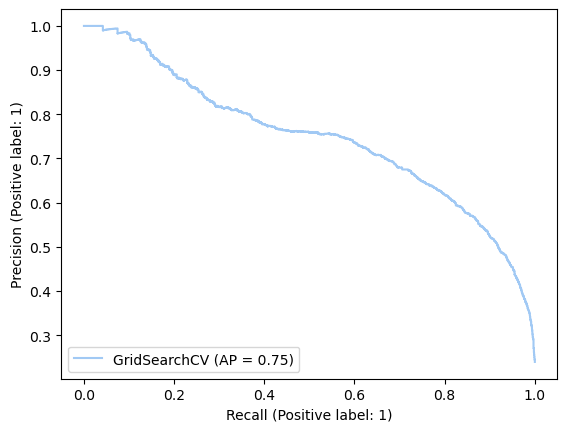

In [161]:
PrecisionRecallDisplay.from_estimator(final_svc_grid_search, x_test, y_test);